In [ ]:
# Boston数据集介绍 https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
# 共计 506 条数据，13 个特征变量和 1 个目标变量（房价中位数）。
# CRIM: 城镇犯罪率。ZN: 占地面积超过 2.5 万平方英尺的住宅用地比例。
# INDUS: 城镇非零售业务地区的比例。CHAS: 查尔斯河是否经过 (=1 经过，=0 不经过)。
# NOX: 一氧化氮浓度（每 1000 万份）。RM: 住宅平均房间数。
# AGE: 所有者年龄。DIS: 与就业中心的距离。
# RAD: 公路可达性指数。TAX: 物业税率。
# PTRATIO: 城镇师生比例。BLACK: 城镇的黑人指数。
# LSTAT: 人口中地位较低人群的百分数。MEDV: 城镇住房价格中位数。

In [ ]:
import pandas as pd

df = pd.read_csv(
    "/root/Data/ml-demo/01LinearRegress_Bostonhouse/course-5-boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# 分离特征变量和目标变量
features = df.columns.tolist()
features.remove('medv')  # MEDV是目标变量
X = df[features]
print(X.describe())
y = df['medv']
print(y.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [12]:
# 分隔训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 13) (102, 13)
(404,) (102,)


In [13]:
# 训练线性回归模型
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("模型训练完成")

模型训练完成


In [14]:
# 评估模型
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"均方误差: {mse}")
print(f"R²得分: {r2}")

均方误差: 24.311426929693514
R²得分: 0.6684825753971582


In [16]:
# 以上误差太大，可能是数据及特征未经处理所致
# 接下来仔细分析数据，进行特征工程和数据清洗

In [17]:
# 两组数据显示出有趣的结论。
# 它们是：ZN（面积超过25,000平方英尺的住宅用地比例），第25和第50百分位数为0。
# 第二，CHAS：查尔斯河虚拟变量（如果与河流相邻，则为1；否则为0），第25、50和75百分位为0。
# 这些总结是可以理解的，因为这两个变量都是条件变量+分类变量。
# 第一个假设是，这些可能在回归任务中没有用处，比如预测MEDV（自住房屋的中位数）。

# 数据集上另一个有趣的事实是MEDV的最大值。
# 从原始数据描述来看，它说：变量#14似乎在50.00处被删除（对应于50,000美元的中位数价格）。
# 基于此，高于50.00的值可能无助于预测MEDV。

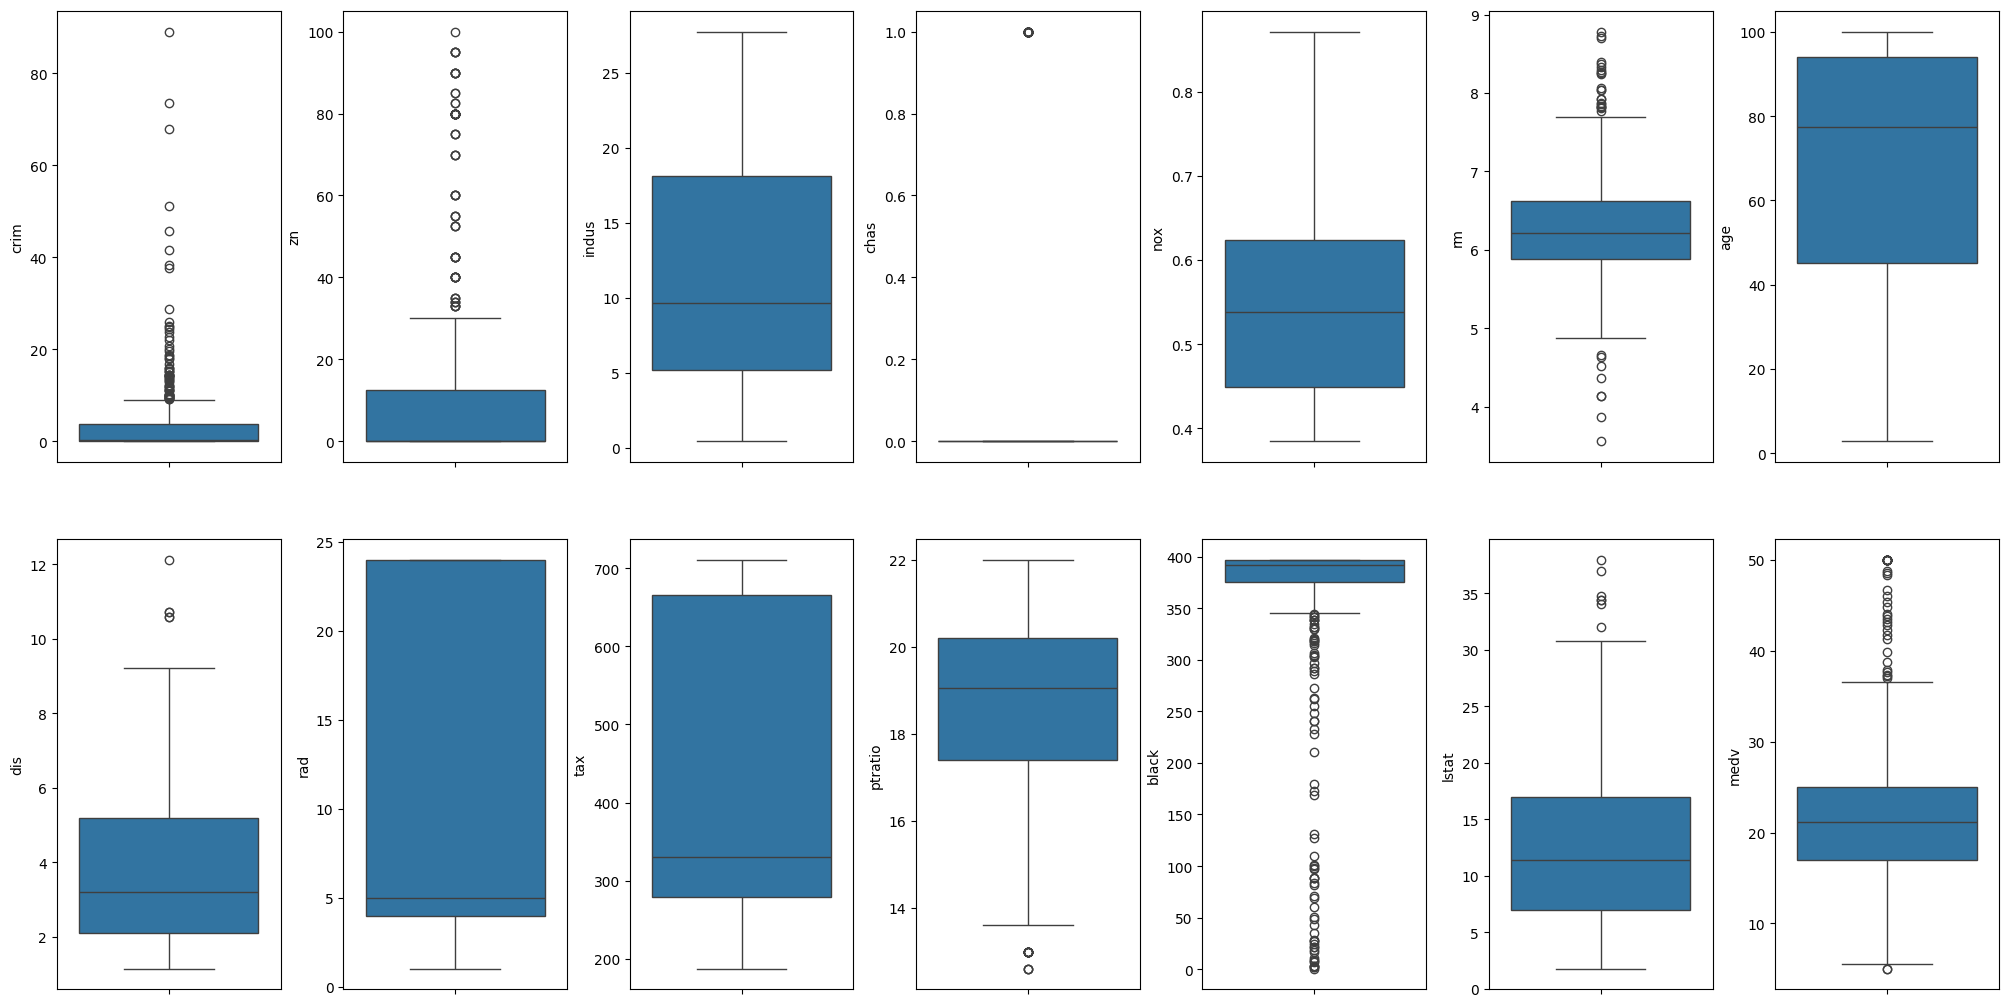

In [ ]:
# 绘制数据集
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 设置2行7列的子图网格，尺寸为20x10，每个子图绘制一个特征的箱线图
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
# 将二维的子图数组（形状为2行7列）转换为一维数组（长度为14），方便通过索引逐个访问每个子图
axs = axs.flatten()

# 循环遍历df的每一列（k是列名，v是列数据）。对每一列，绘制箱线图：
# y=k指定箱线图的y轴数据为当前列k的值。
# data=df指定数据源为 df。
# ax=axs[index]将箱线图绘制到对应的子图上（通过索引index访问展平后的子图数组）。
# 每次循环后，index += 1递增索引，移动到下一个子图。
index = 0
for k, v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1

# 自动调整子图之间的间距，避免重叠：
# pad=0.4设置图形边缘与子图之间的内边距。
# w_pad=0.5设置子图之间的水平间距。
# h_pad=5.0设置子图之间的垂直间距。
# plt.show()最终显示生成的图形。
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
# 像CRIM， ZN， RM， Black这样的列似乎有异常值。我们来看看每一列的异常值百分比。
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    # 四分位距（IQR），即q3 - q1，衡量数据的离散程度
    iqr = q3 - q1
    # 低于q1 - 1.5 * iqr或高于q3 + 1.5 * iqr的值。这是箱线图中常用的异常值阈值（Tukey's fences方法）。
    # v_col是一个Series，包含当前列中的所有异常值
    v_col = v[(v <= (q1 - 1.5 * iqr)) | (v >= (q3 + 1.5 * iqr))]
    # 计算异常值百分比，len(v_col)是异常值的数量，len(v)是当前列的总数据点数。
    perc = len(v_col) / len(v) * 100
    
    print(f"{k} 异常值百分比: {perc:.2f}%")

crim 异常值百分比: 12.85%
zn 异常值百分比: 13.44%
indus 异常值百分比: 0.00%
chas 异常值百分比: 100.00%
nox 异常值百分比: 0.00%
rm 异常值百分比: 5.93%
age 异常值百分比: 0.00%
dis 异常值百分比: 0.99%
rad 异常值百分比: 0.00%
tax 异常值百分比: 0.00%
ptratio 异常值百分比: 2.96%
black 异常值百分比: 15.22%
lstat 异常值百分比: 1.38%
medv 异常值百分比: 7.91%


In [23]:
# 去除MEDV异常值（MEDV>=50）
df = df[df['medv'] < 50]
print("去除MEDV异常值后数据集大小:", df.shape)

去除MEDV异常值后数据集大小: (490, 14)


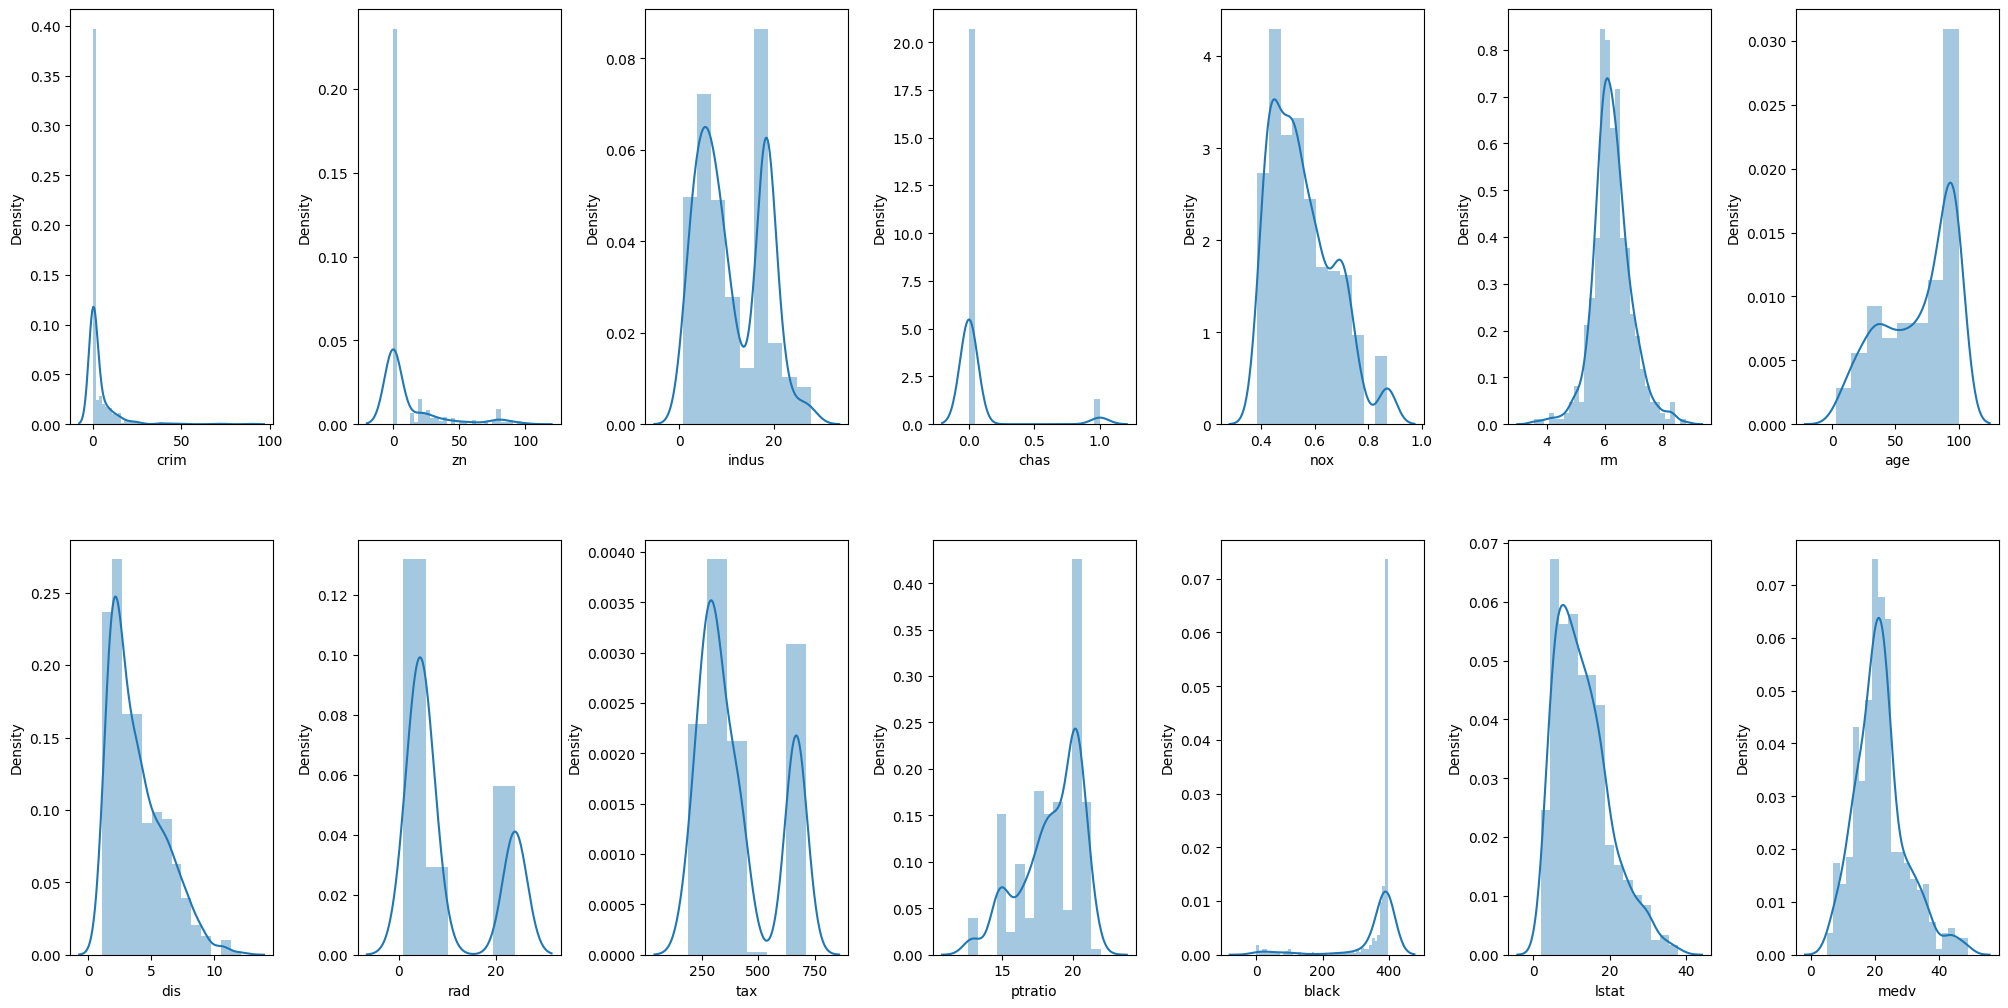

In [ ]:
# 然后观察这些特征加上MEDV清理版
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(ncols=7,nrows=2, figsize=(20,10))
axs = axs.flatten()
index = 0
for k, v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
# 直方图显示，列CRIM， ZN， B具有高度偏态分布。
# 此外，MEDV看起来具有正态分布（预测）
# 其他列似乎具有数据的正态或双模分布，除了CHAS（这是一个离散变量）。

<Axes: >

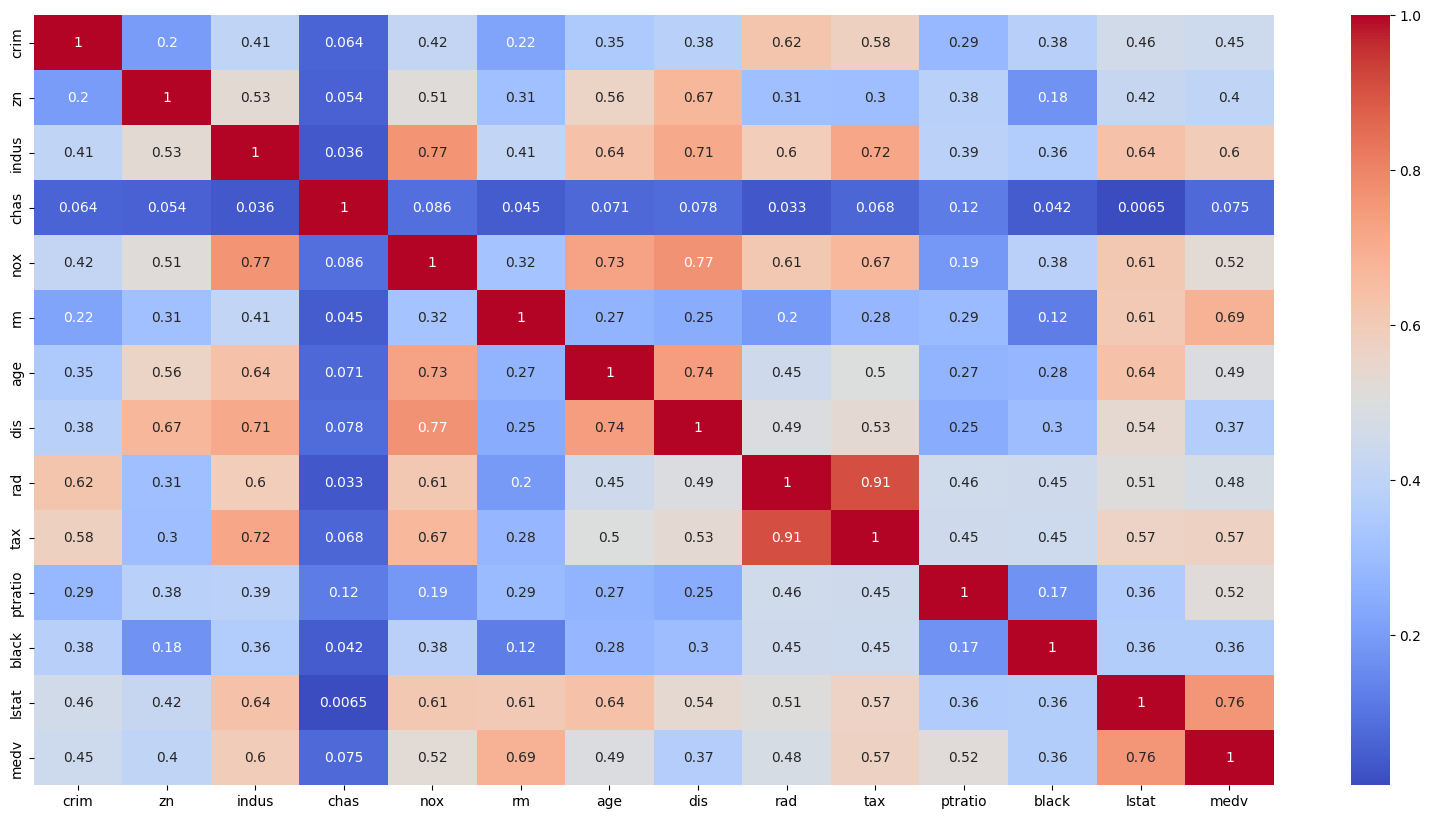

In [28]:
# 然后绘制数据的两两相关性
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True, cmap='coolwarm')

In [ ]:
# 从相关矩阵可以看出，
# TAX和RAD是高度相关的特征。
# 列LSTAT， INDUS， RM， TAX， NOX， PTRAIO与MEDV的相关性评分高于0.5，这是一个很好的预测指标。

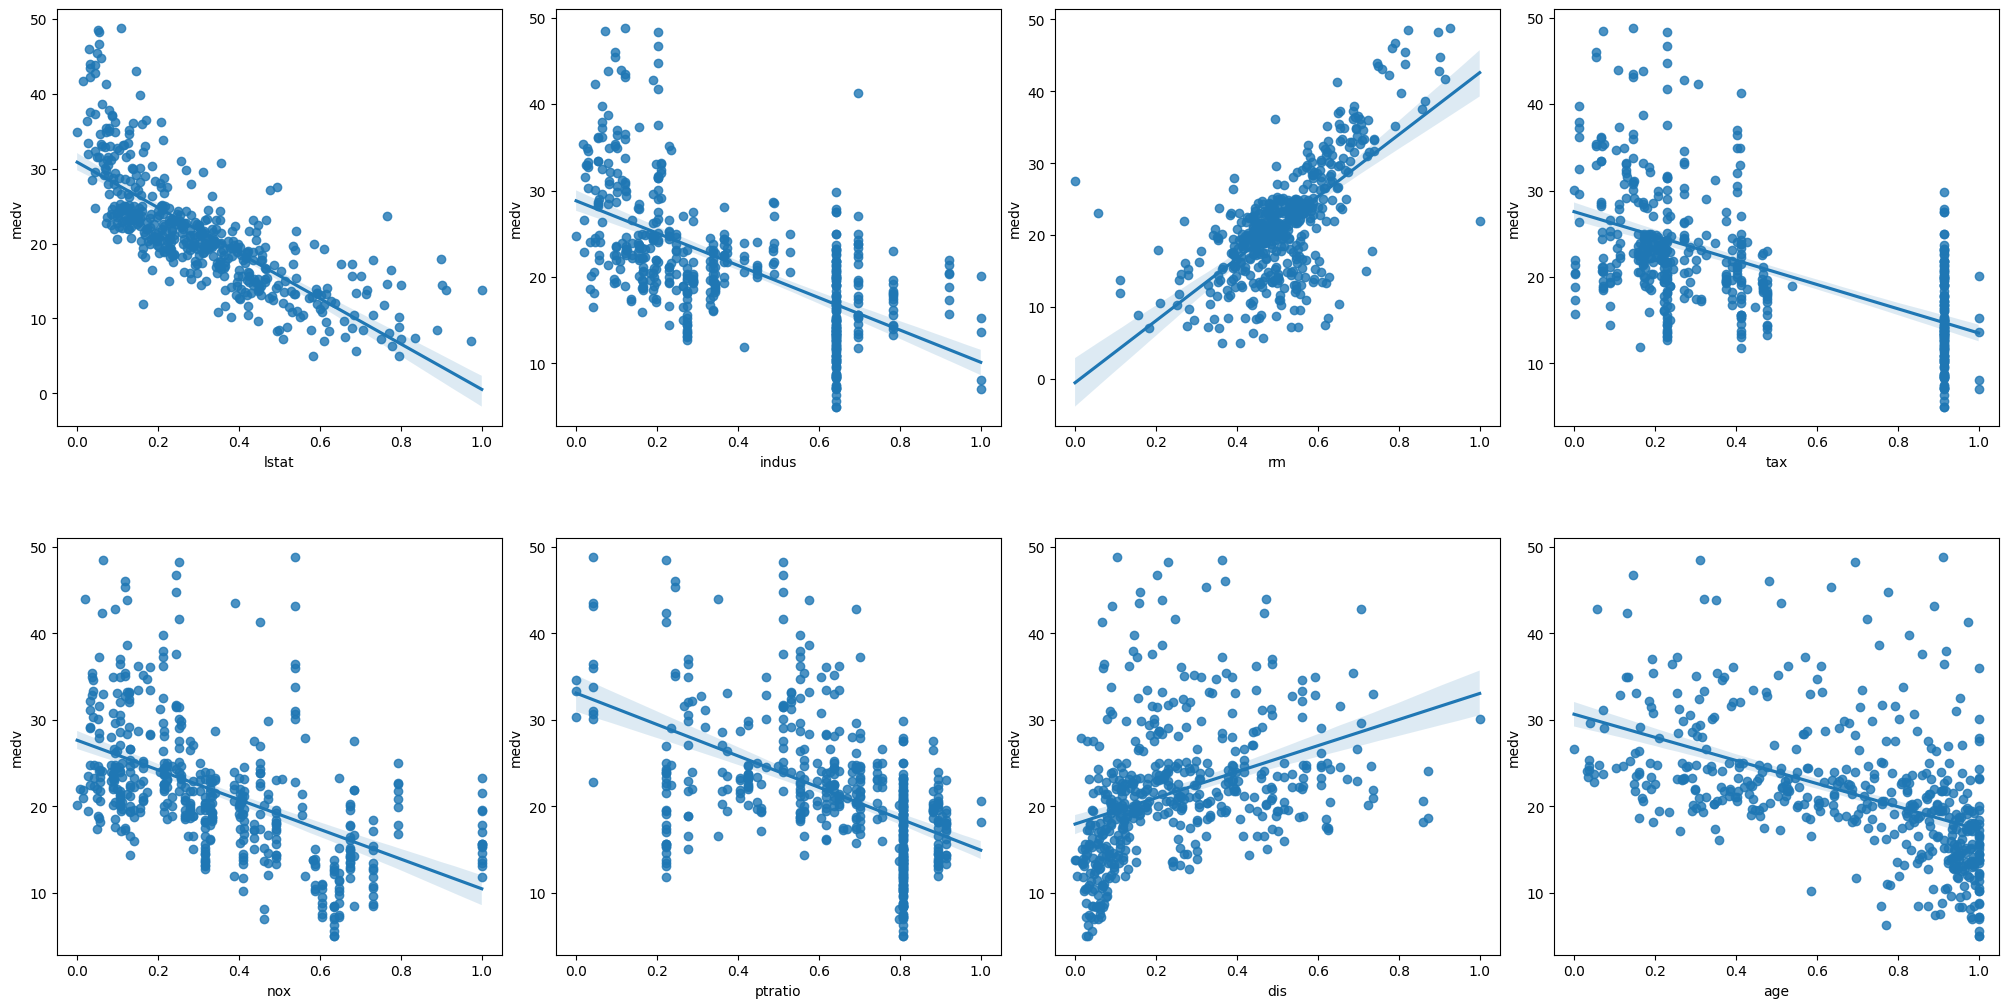

In [ ]:
# 让我们根据MEDV绘制这些列
from sklearn import preprocessing

# 创建MinMaxScaler对象，用于将数据缩放到指定范围（默认[0, 1]）。这种标准化方法能消除量纲影响，使不同特征具有可比性
min_max_scaler = preprocessing.MinMaxScaler()
col_sels = ['lstat', 'indus', 'rm', 'tax', 'nox', 'ptratio', 'dis', 'age']
x = df.loc[:, col_sels]
# min_max_scaler.fit_transform(x)对特征数据x进行拟合和转换：计算每列的最小值和最大值，然后将数据线性缩放到[0, 1]区间。
# 将缩放后的NumPy数组转换回Pandas DataFrame，并保留原列名，便于后续处理
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=col_sels)
y = df['medv']

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
axs = axs.flatten()
index = 0
for k in col_sels:
    # 使用Seaborn的sns.regplot()函数绘制回归图：
    # y=y指定目标变量为medv（y轴）。
    # x=x[k]指定当前标准化后的特征列（x轴）。
    sns.regplot(y=y, x=x[k], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
# 因此，通过这些分析，可以尝试用‘LSTAT’， ‘INDUS’， ‘NOX’， ‘PTRATIO’， ‘RM’， ‘TAX’， ‘DIS’， ‘AGE’特征来预测MEDV

In [33]:
# 让我们尝试通过对数变换来消除数据的偏度
import numpy as np

y = np.log1p(y)  # 对目标变量MEDV进行对数变换，np.log1p计算log(1 + y)，避免y为0时的计算问题 
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:  # 仅对偏度大于0.3的列进行变换
        x[col] = np.log1p(x[col])  # 对每个特征列进行对数变换

In [35]:
# 线性回归验证
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold

l_reg = linear_model.LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# 交叉验证评估模型
scores = cross_val_score(l_reg, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("线性回归模型10折交叉验证均方误差:", -scores.mean(), "±", scores.std())
scores_r2 = cross_val_score(l_reg, x_scaled, y, cv=kf, scoring='r2')
print("线性回归模型10折交叉验证R²得分:", scores_r2.mean(), "±", scores_r2.std())

线性回归模型10折交叉验证均方误差: 0.03314931502075551 ± 0.006988856375938443
线性回归模型10折交叉验证R²得分: 0.7412493729896152 ± 0.04398017978293357
